# Hypergraph information

In [48]:
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from tqdm import tqdm

sys.path.append("../src/")

import xgi
from reducibility_hg import *

sb.set_theme(style="ticks", context="paper")


In [49]:
results_dir = "../results/"
out_dir  = f"{results_dir}datasets/"

In [50]:
import os, glob

In [51]:
glob.glob(f"{out_dir}message_length*.npz")

['../results/datasets/message_length_hospital-lyon.npz',
 '../results/datasets/message_length_email-enron.npz',
 '../results/datasets/message_length_email-eu.npz',
 '../results/datasets/message_length_contact-primary-school.npz',
 '../results/datasets/message_length_tags-ask-ubuntu.npz',
 '../results/datasets/message_length_contact-high-school.npz']

In [53]:
data = dict()

for file_name in glob.glob(f"{out_dir}message_length*.npz"):
    
    data_i = np.load(file_name)
    
    dataset = file_name.split("/")[-1].split(".")[0].split("_")[-1]
        
    data[dataset] = {}
    data[dataset]["Q"] = data_i["Q"]
    data[dataset]["orders"] = data_i["orders"]
    data[dataset]["tau_c"] = data_i["tau_c"]
    
    print(dataset)

hospital-lyon
email-enron
email-eu
contact-primary-school
tags-ask-ubuntu
contact-high-school


hospital-lyon overlapping
email-enron overlapping
email-eu overlapping
contact-primary-school overlapping
tags-ask-ubuntu unknown
contact-high-school overlapping


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


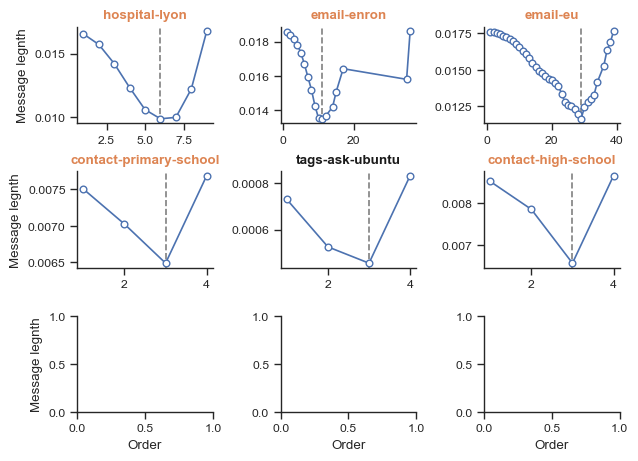

In [56]:
n_sets = len(data)

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(7, 5))

for i, (dataset, vals_dict) in enumerate(data.items()):

    ax = axs.flatten()[i]

    Q = vals_dict["Q"]
    orders = vals_dict["orders"]
    
    ax.plot(orders, Q, "o-", mfc="white")

    i_min = np.argmin(Q)
    ax.axvline(orders[i_min], c="grey", ls="--", zorder=-2)
    
    cat = category(cat_dict[dataset])
    print(dataset, cat)
    if cat == "overlapping":
        col = "C1"
    elif cat == "non-overlapping":
        col = "g"
    else: 
        col = "k"

    ax.set_title(dataset, weight="bold", color=col)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

for ax in axs[:, 0]:
    ax.set_ylabel("Message legnth")

for ax in axs[-1, :]:
    ax.set_xlabel("Order")
    
sb.despine()

fig_name = f"figure_1_v1" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

In [14]:
data = dict()

for file_name in glob.glob(f"{out_dir}message_length*.npz"):
    
    data_i = np.load(file_name)
    
    dataset = file_name.split("/")[-1].split(".")[0].split("_")[-1]
        
    data[dataset] = data_i["Q"]
    
    print(dataset)

diseasome
ndc-substances
hospital-lyon
congress-bills
email-enron
email-eu
contact-primary-school
tags-ask-ubuntu
contact-high-school


/Users/maxime/.pyenv/versions/venv_xgi/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


diseasome non-overlapping
ndc-substances non-overlapping
hospital-lyon overlapping
congress-bills unknown
email-enron overlapping
email-eu overlapping
contact-primary-school overlapping
tags-ask-ubuntu unknown
contact-high-school overlapping


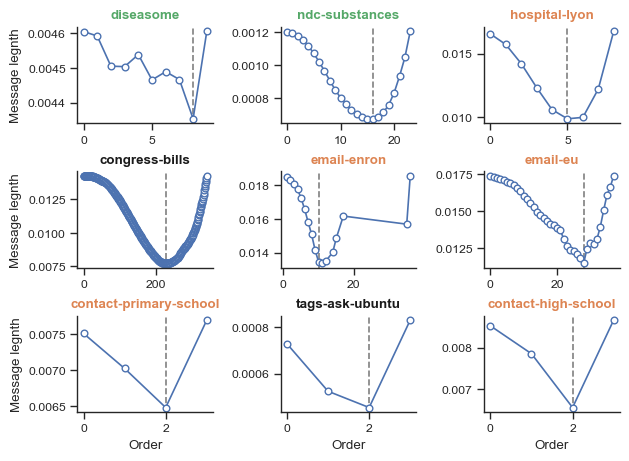

In [41]:
n_sets = len(data)

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(7, 5))

for i, (dataset, Q) in enumerate(data.items()):

    ax = axs.flatten()[i]
    
    if dataset=="email-enron":
        orders = np.array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 17, 35, 36])
        ax.plot(orders, Q, "o-", mfc="white")
    else:
        ax.plot(Q, "o-", mfc="white")

    i_min = np.argmin(Q)
    ax.axvline(i_min, c="grey", ls="--", zorder=-2)
    
    cat = category(cat_dict[dataset])
    print(dataset, cat)
    if cat == "overlapping":
        col = "C1"
    elif cat == "non-overlapping":
        col = "g"
    else: 
        col = "k"

    ax.set_title(dataset, weight="bold", color=col)

plt.subplots_adjust(wspace=0.5, hspace=0.5)

for ax in axs[:, 0]:
    ax.set_ylabel("Message legnth")

for ax in axs[-1, :]:
    ax.set_xlabel("Order")
    
sb.despine()

fig_name = f"figure_1_v1" #lambda2_HG_SC_N_{N}_ps_{ps}_nrep_{n_repetitions}"

plt.savefig(f"{out_dir}{fig_name}.png", dpi=250, bbox_inches="tight")
plt.savefig(f"{out_dir}{fig_name}.pdf", dpi=250, bbox_inches="tight")

In [ ]:
socio / tech : overlapping
bio / techno : non

In [33]:
cat_dict = {
    "diseasome": "bio",
    "ndc-substances": "bio",
    "hospital-lyon": "socio",
    "congress-bills": "?",
    "email-enron": "tech", 
    "email-eu": "tech", 
    "contact-primary-school": "socio",
    "tags-ask-ubuntu": "?",
    "contact-high-school": "socio"
}

def category(area):
    if area in ["socio", "tech"]:
        return "overlapping"
    elif area in ["co-auth", "bio"]:
        return "non-overlapping"
    else: 
        return "unknown"

In [44]:
compute_information??

In [46]:
dataset

'contact-high-school'